In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("dataset/велосипеды/50945786_3.csv")

data['Дата'] = pd.to_datetime(data['Дата'])

/var/folders/fq/3g_66wjn7h7gfmsyw5r8719c0000gs/T/ipykernel_1010/3777348128.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Дата'] = pd.to_datetime(data['Дата'])


In [22]:
data.keys()

Index(['Дата', 'Группа', '№ Группы', '№ Объявления', 'Тип площадки', 'Формат',
       'Размер изображения', 'Тип устройства', 'Пол', 'Категория таргетинга',
       'Упоминание брендов', 'Уровень платежеспособности', 'Возраст',
       'Заголовок', 'Текст', 'Ссылка', 'Показы', 'Взвешенные показы', 'Клики',
       'CTR (%)', 'wCTR (%)', 'Расход (руб.)',
       'Конверсия (%)/Товар добавлен в корзину',
       'Конверсия (%)/Заказ оформлен',
       'Конверсия (%)/Лид с Centra Market//Динамика',
       'Конверсии/Товар добавлен в корзину', 'Конверсии/Заказ оформлен',
       'Конверсии/Лид с Centra Market//Динамика'],
      dtype='object')

In [23]:
grouped = data.groupby('№ Группы')

tables = {group: group_df for group, group_df in grouped}



4296804875


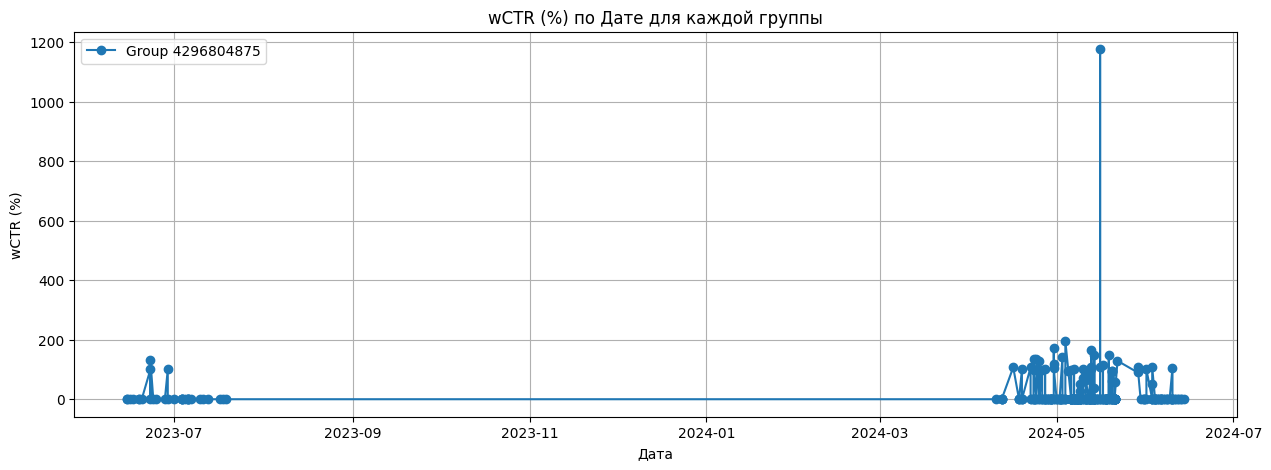

4296804877


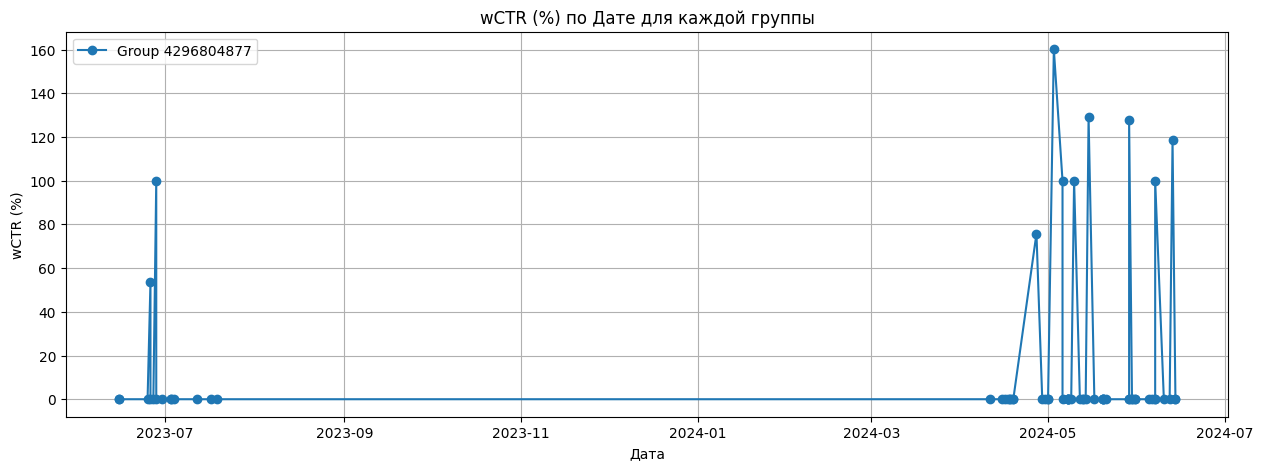

4296804878


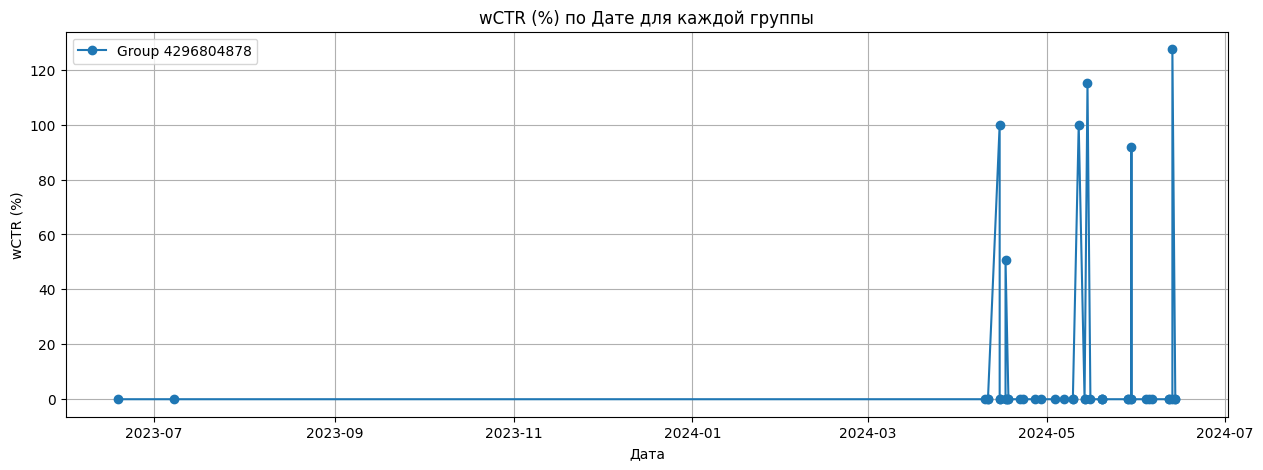

4296804879


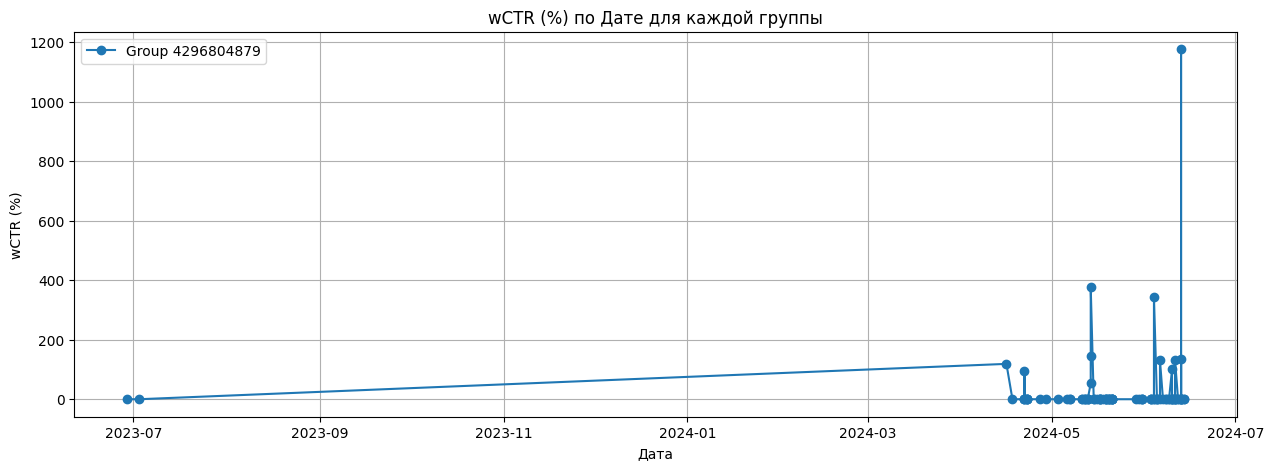

4296804880


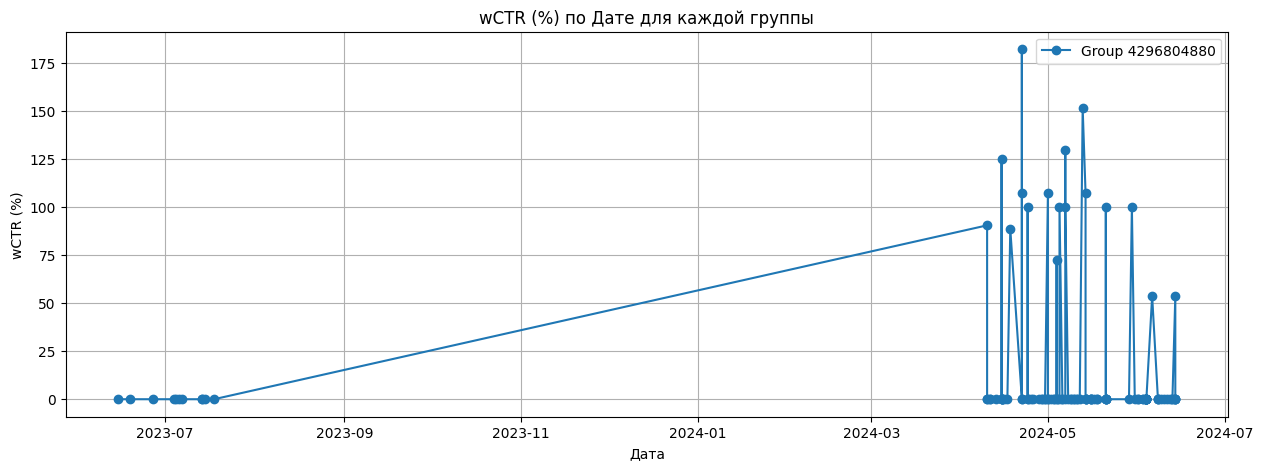

4296804881


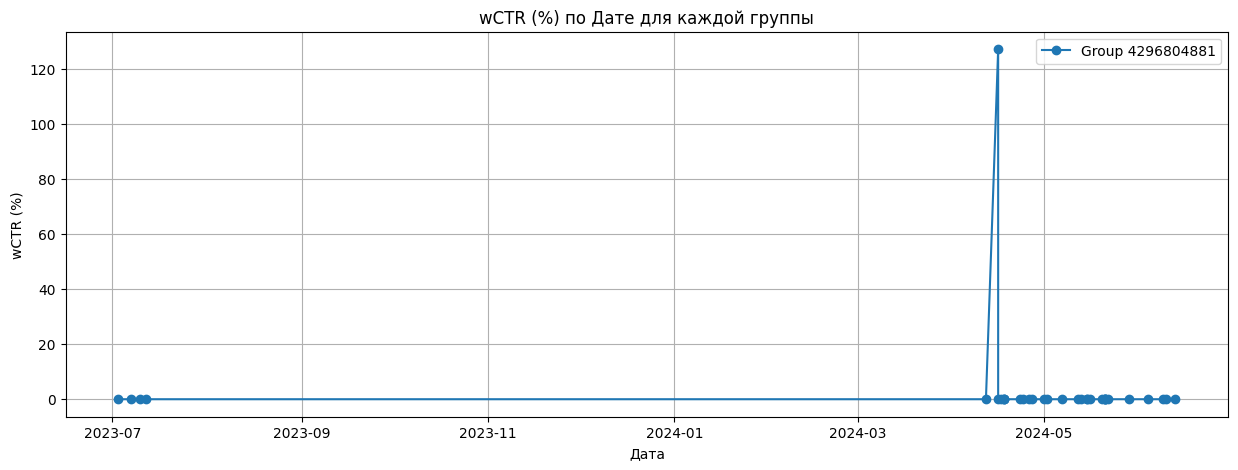

4296804882


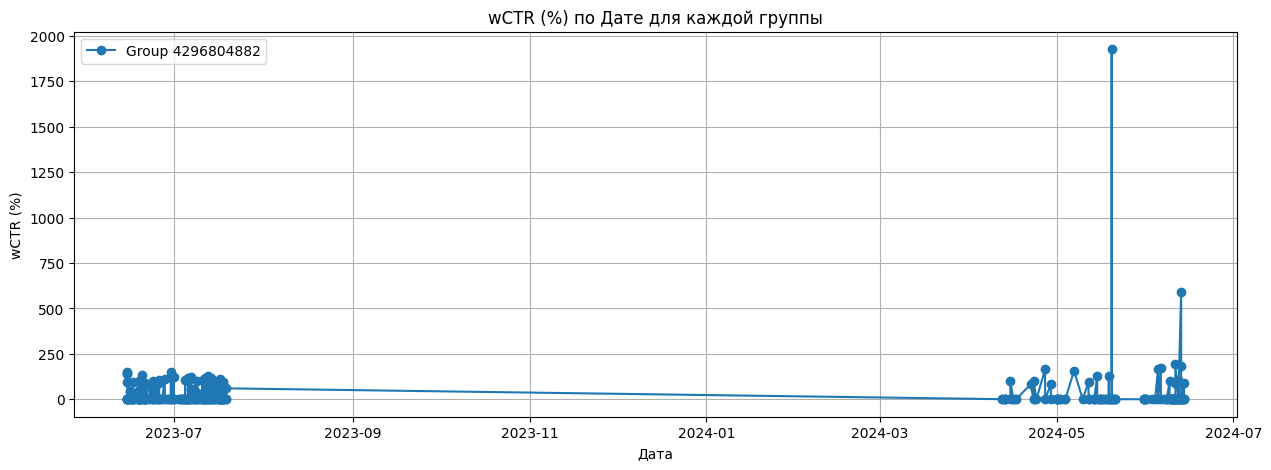

4296804884


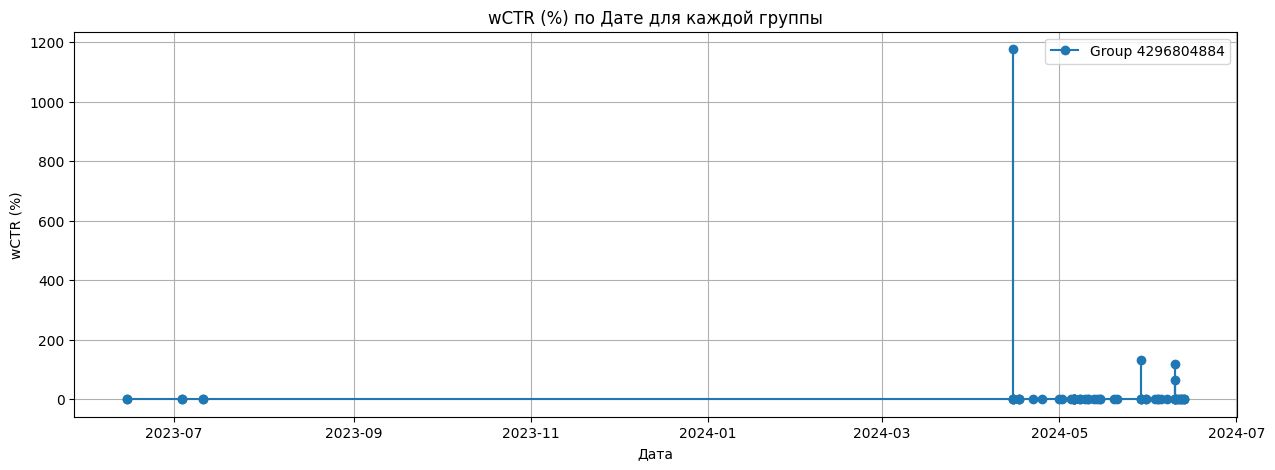

4296804885


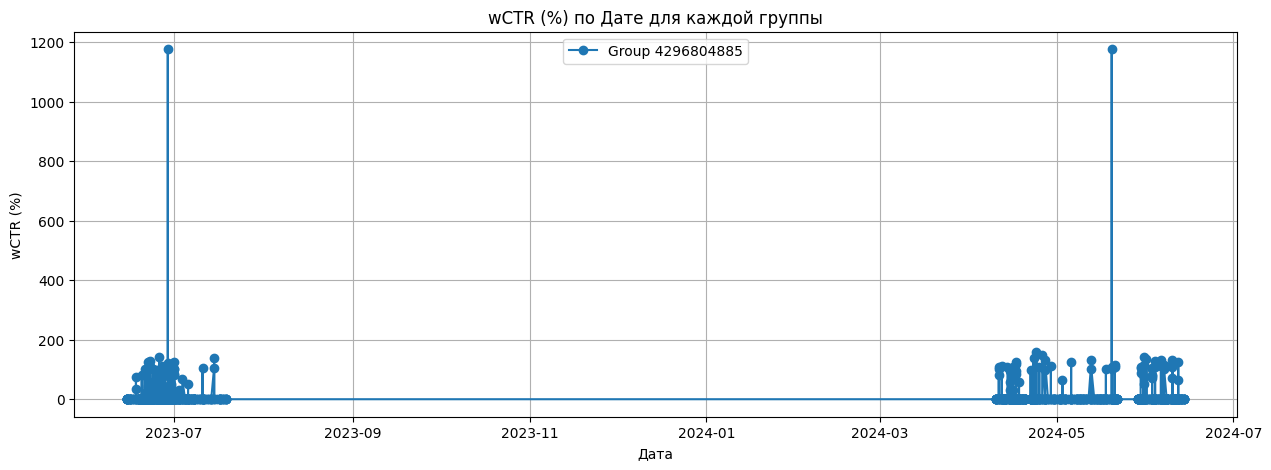

4296804886


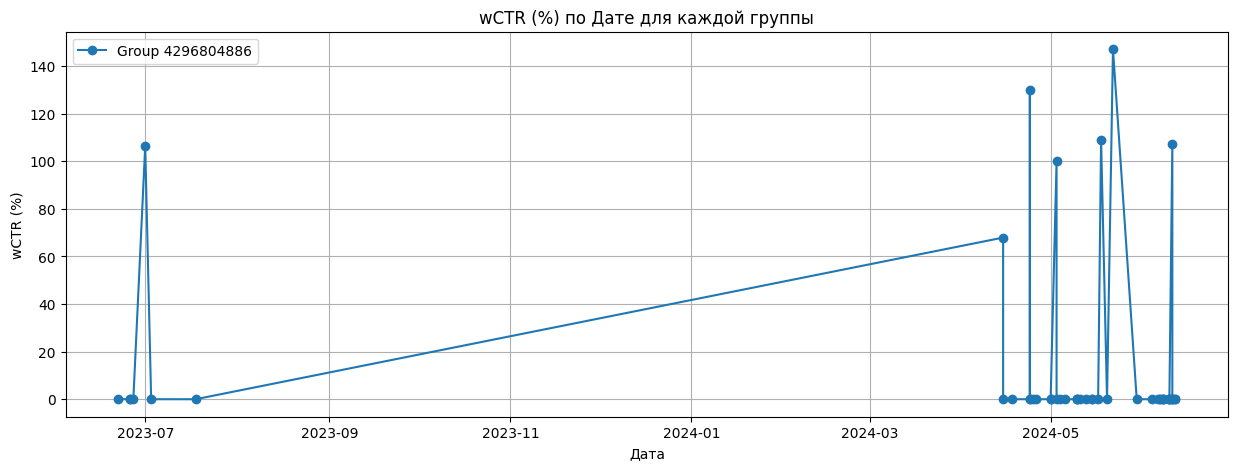

4296804887


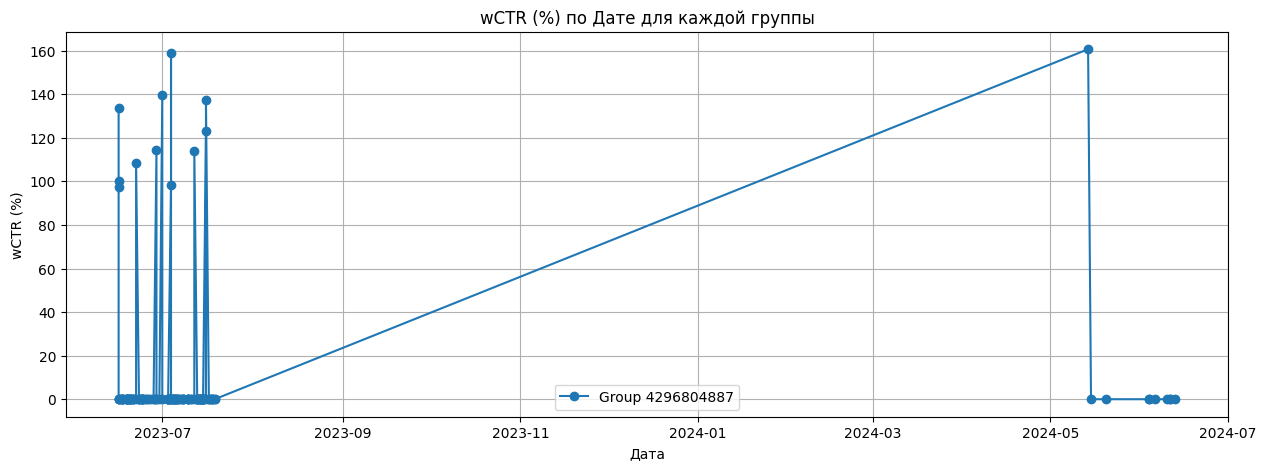

4296804889


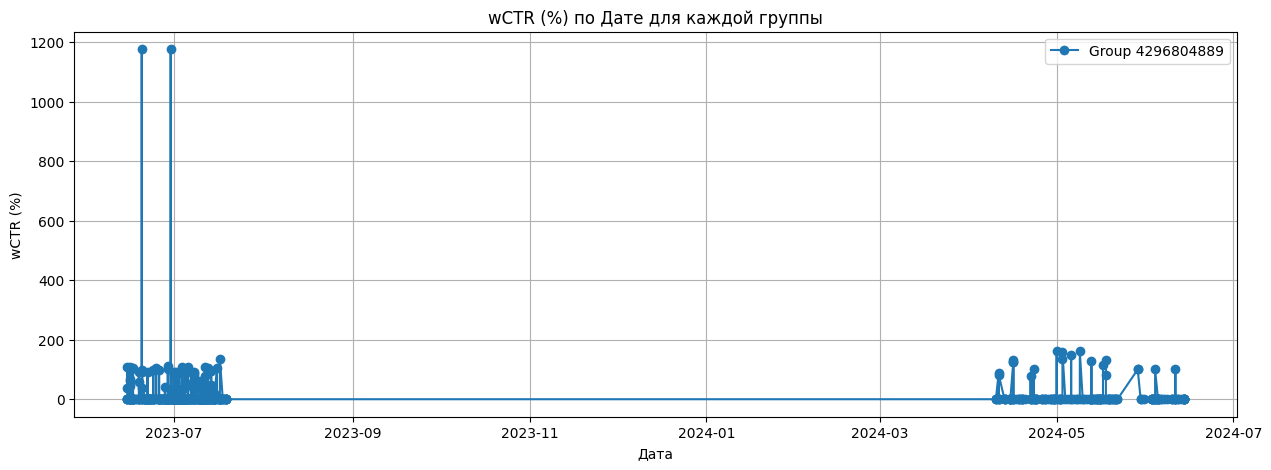

4296804891


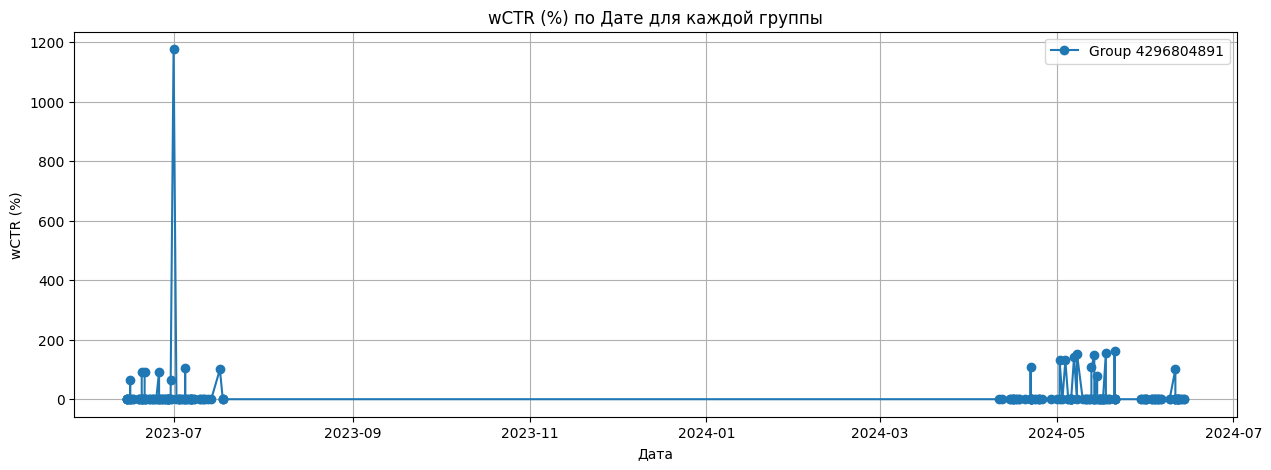

4296804893


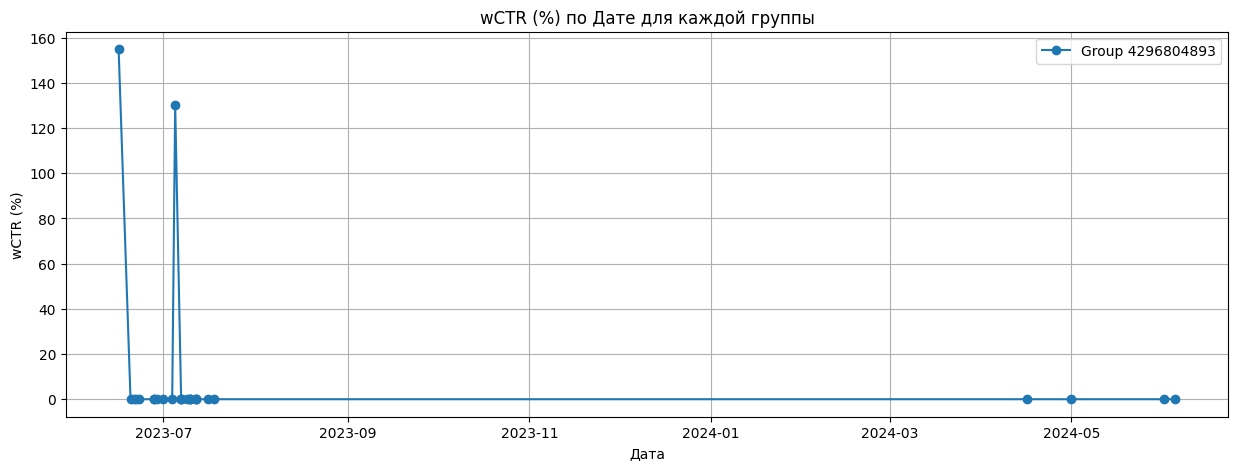

4296804894


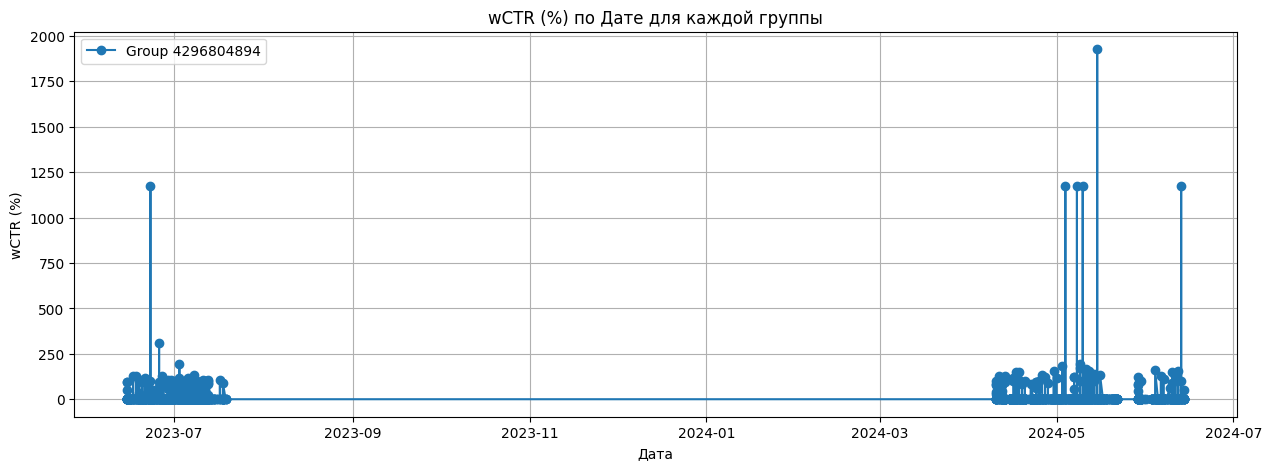

4296804896


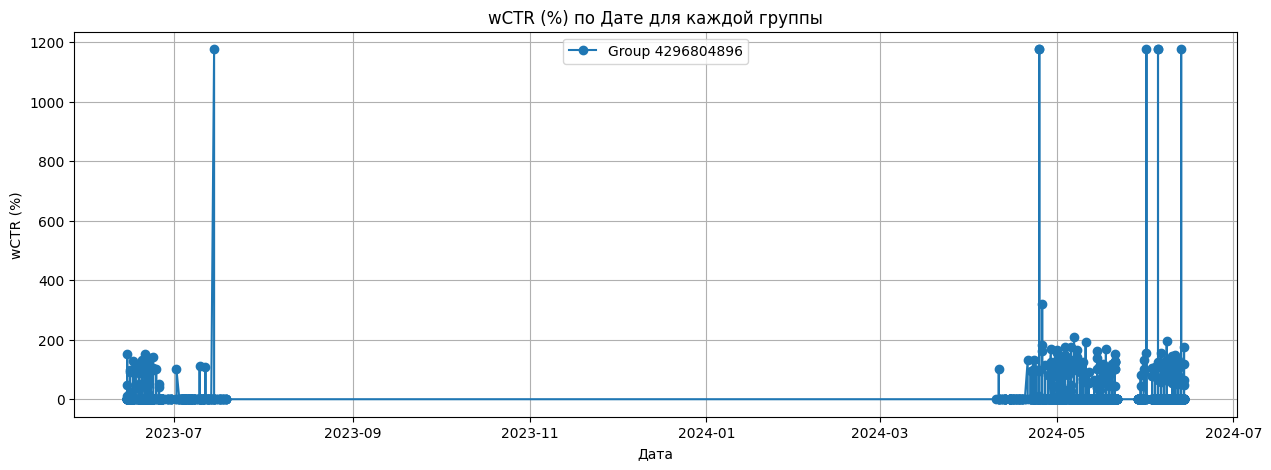

4296804897


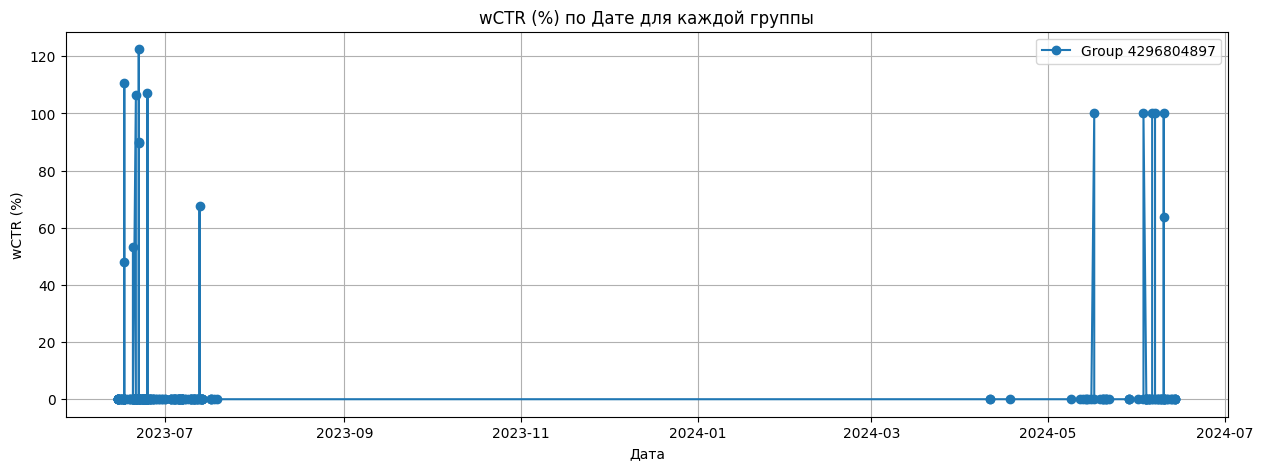

4296804898


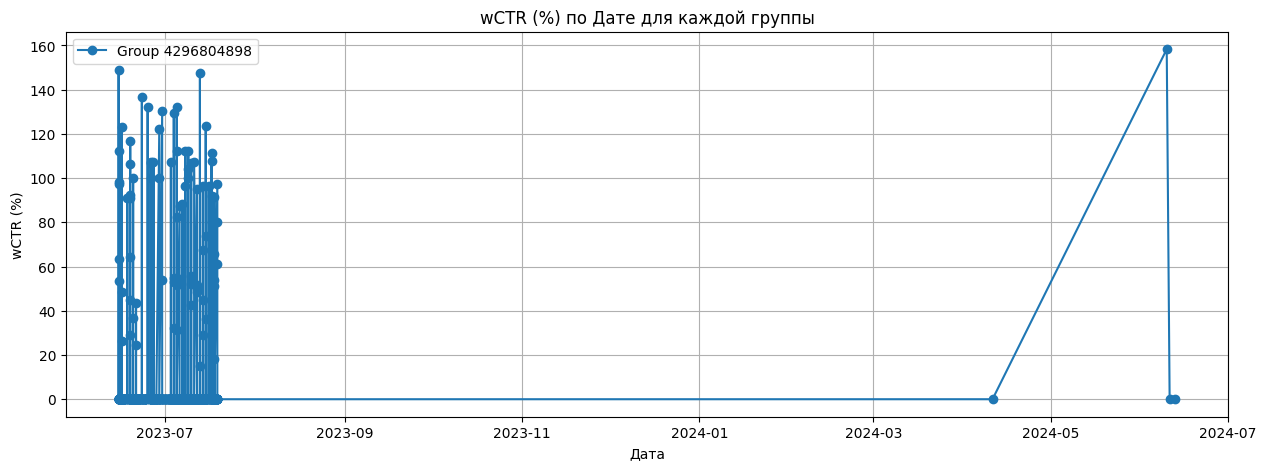

4296804901


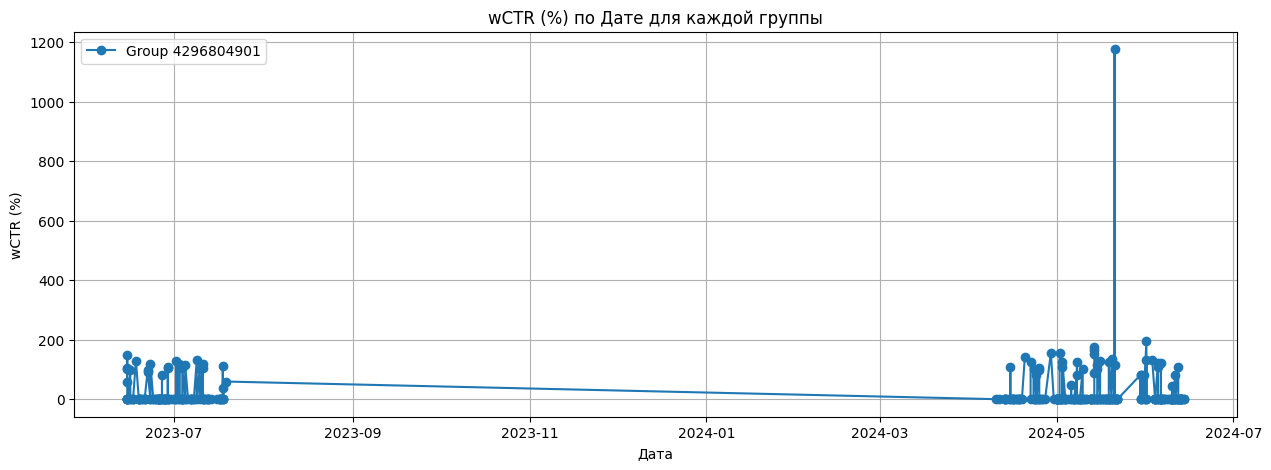

4296804902


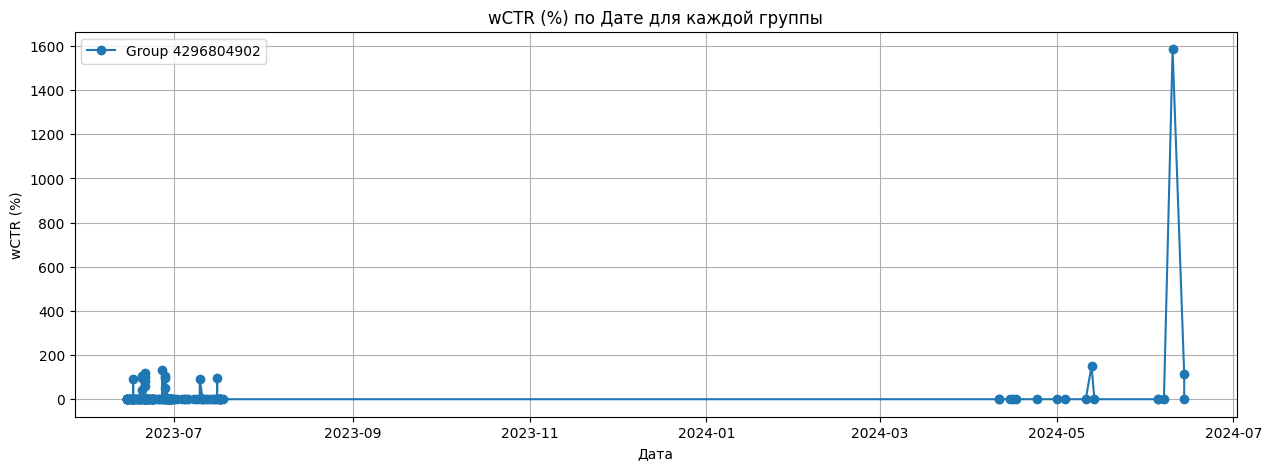

4296804903


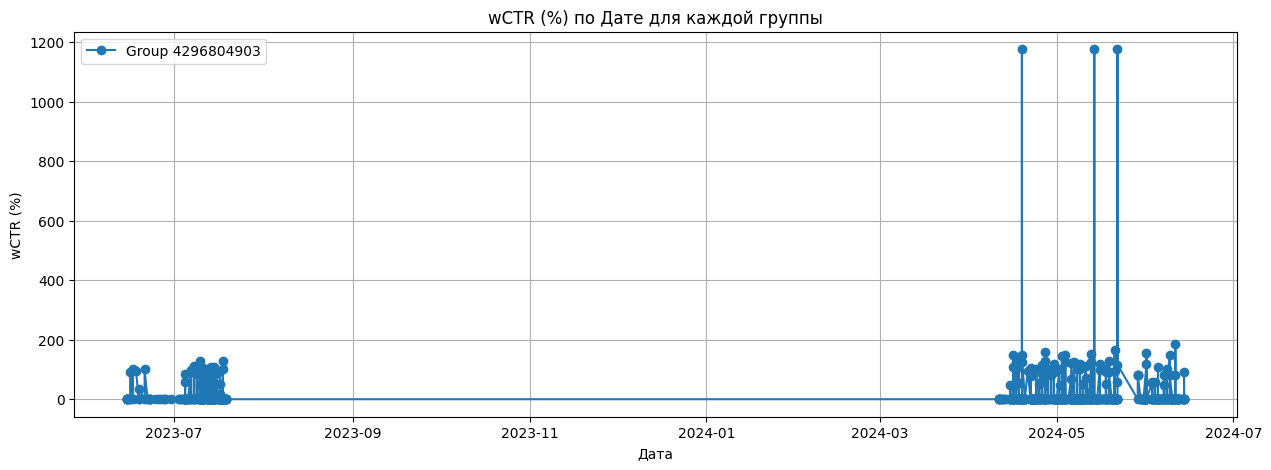

4296804904


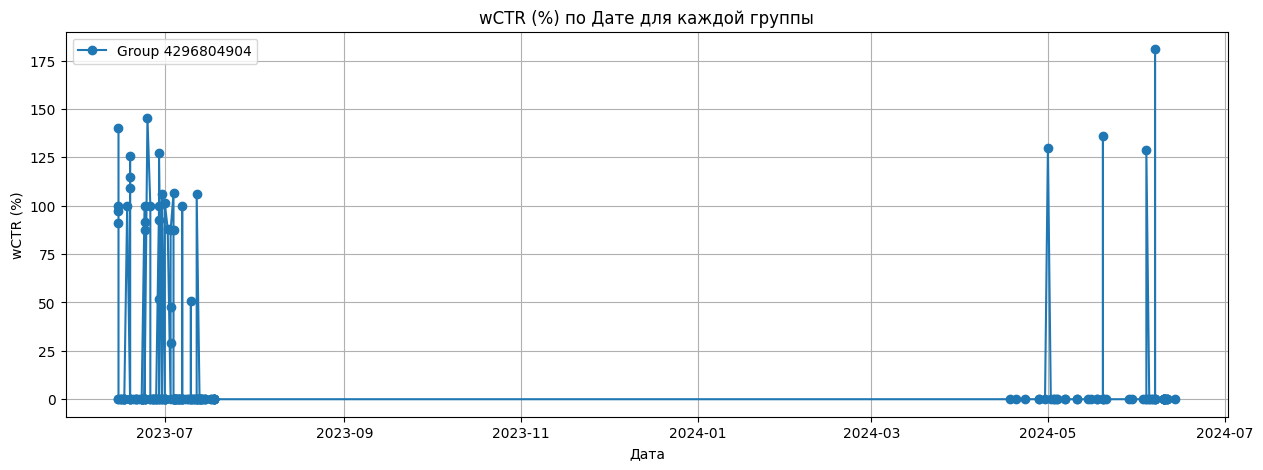

4296804905


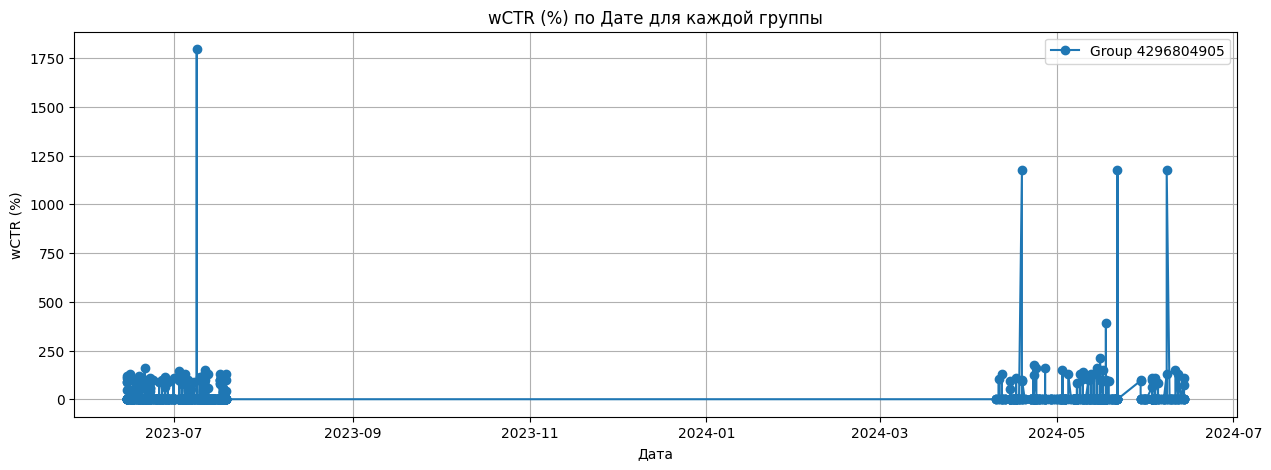

4296804906


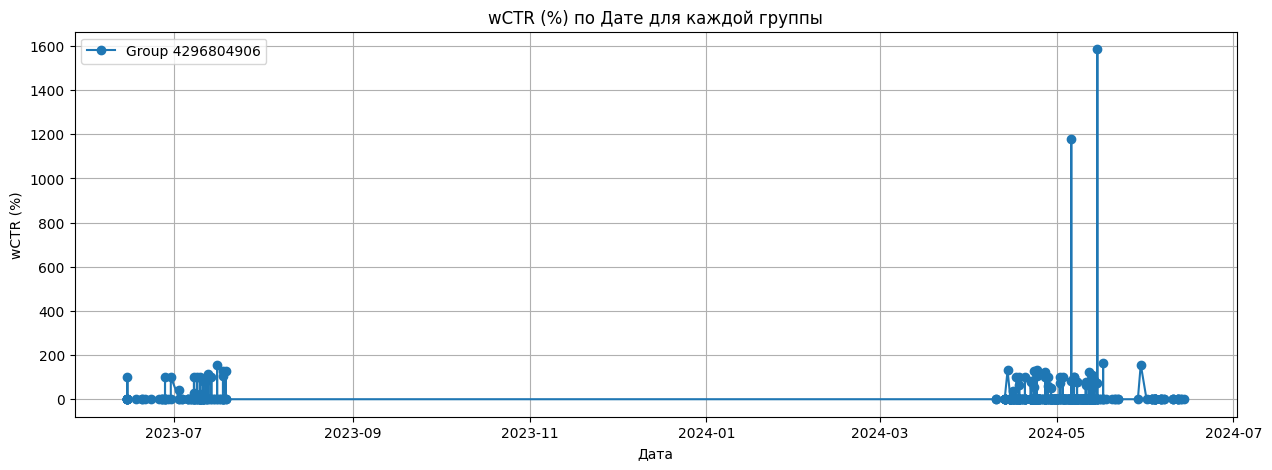

4296804907


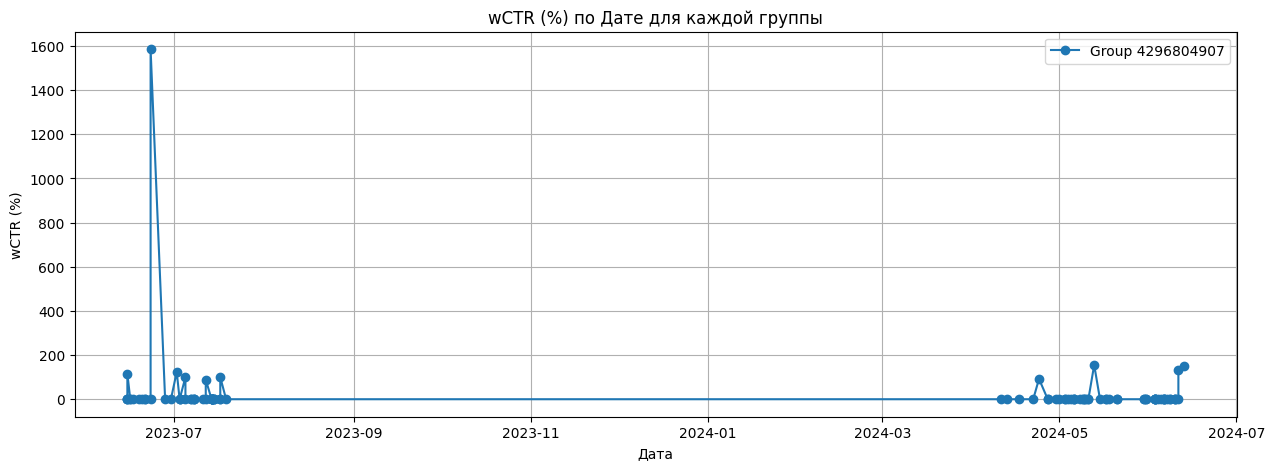

In [36]:
for group, group_df in grouped:
    print(group)
    plt.figure(figsize=(15,5))
    group_df = group_df.sort_values(by='Дата')
    plt.plot(group_df['Дата'], group_df['wCTR (%)'], marker='o', label=f'Group {group}')

    # Настройка графика
    plt.title('wCTR (%) по Дате для каждой группы')
    plt.xlabel('Дата')
    plt.ylabel('wCTR (%)')
    plt.legend()
    plt.grid(True)
    
    # Отображение графика
    plt.show()

In [32]:
!pip install prophet


# Prophet

# Обзор библиотеки Prophet

Библиотека **Prophet** — это инструмент для прогнозирования временных рядов, разработанный Facebook. Она позволяет эффективно моделировать сезонные и трендовые компоненты временных рядов, делая её подходящей для данных с регулярными шаблонами и пропусками в записях.

---

## Основная идея Prophet

Prophet использует аддитивную модель, чтобы разложить временной ряд на несколько основных частей:

1. **Тренд** — долгосрочная направленность временного ряда (рост или спад).
2. **Сезонность** — повторяющиеся шаблоны, связанные с периодичностью (например, месячная или годовая сезонность).
3. **Праздники** — влияние отдельных событий или дней, которые не относятся к регулярной сезонности.
4. **Шум** — случайные флуктуации, которые нельзя объяснить трендом или сезонностью.

Модель Prophet представляется следующим уравнением:

$$
y(t) = g(t) + s(t) + h(t) + \epsilon_t,
$$

где:
- \( g(t) \) — трендовая компонента,
- \( s(t) \) — сезонная компонента,
- \( h(t) \) — эффект праздников,
- \( \epsilon_t \) — остаточная ошибка (шум).

---

## 1. Трендовая компонента \( g(t) \)

Prophet предлагает два типа трендов:

- **Линейный тренд**:
  $$
  g(t) = (k + a(t)\delta)t + (m + a(t)\gamma),
  $$
  где \( k \) — наклон, \( m \) — пересечение с осью, \( a(t) \) — индикаторная функция, показывающая смену тренда, \( \delta \) и \( \gamma \) — изменения наклона и пересечения соответственно.

- **Логистический тренд** (для данных с насыщением):
  $$
  g(t) = \frac{C}{1 + \exp(-k(t - t_0))},
  $$
  где \( C \) — асимптотический предел, \( k \) — скорость роста, \( t_0 \) — временной сдвиг.

---

## 2. Сезонная компонента \( s(t) \)

Сезонность моделируется как сумма гармонических функций:

$$
s(t) = \sum_{n=1}^{N} \left[a_n \cos\left(\frac{2\pi n t}{P}\right) + b_n \sin\left(\frac{2\pi n t}{P}\right)\right],
$$

где:
- \( P \) — период (например, 365 дней для годовой сезонности),
- \( a_n \), \( b_n \) — коэффициенты, определяемые из данных.

Этот подход позволяет улавливать как простые, так и сложные периодические шаблоны.

---

## 3. Праздничные эффекты \( h(t) \)

Эффект праздников моделируется с использованием индикаторных переменных:

$$
h(t) = \sum_{i=1}^{L} \alpha_i \cdot \mathbb{1}_{\{t \in \text{holiday}_i\}},
$$

где \( \alpha_i \) — влияние конкретного праздника, \( \mathbb{1}_{\{t \in \text{holiday}_i\}} \) — индикатор, равный 1, если \( t \) попадает на праздник \( i \), и 0 иначе.

---

## 4. Остаточная ошибка \( \epsilon_t \)

Остатки \( \epsilon_t \) считаются независимыми и идентично распределёнными (i.i.d.) с нулевым средним:

$$
\epsilon_t \sim \mathcal{N}(0, \sigma^2).
$$

---

## Обучение модели

Prophet использует подход **MAP (Maximum A Posteriori)** для оценки параметров. Это включает:
- Определение априорных распределений для параметров \( g(t) \), \( s(t) \), и \( h(t) \).
- Оптимизацию вероятности данных с использованием метода градиентного спуска.

---

## Интуитивные особенности Prophet

1. **Гибкость**. Prophet автоматически подбирает параметры и сглаживает изменения в данных.
2. **Обработка пропусков**. Данные с пропусками обрабатываются корректно, так как модель не требует равномерного временного шага.
3. **Интерактивность**. Можно задавать пользовательские априорные предположения для тренда, сезонности и праздников.


### Пробуем моделировать спрос на одной из компаний

08:29:42 - cmdstanpy - INFO - Chain [1] start processing
08:29:42 - cmdstanpy - INFO - Chain [1] done processing
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

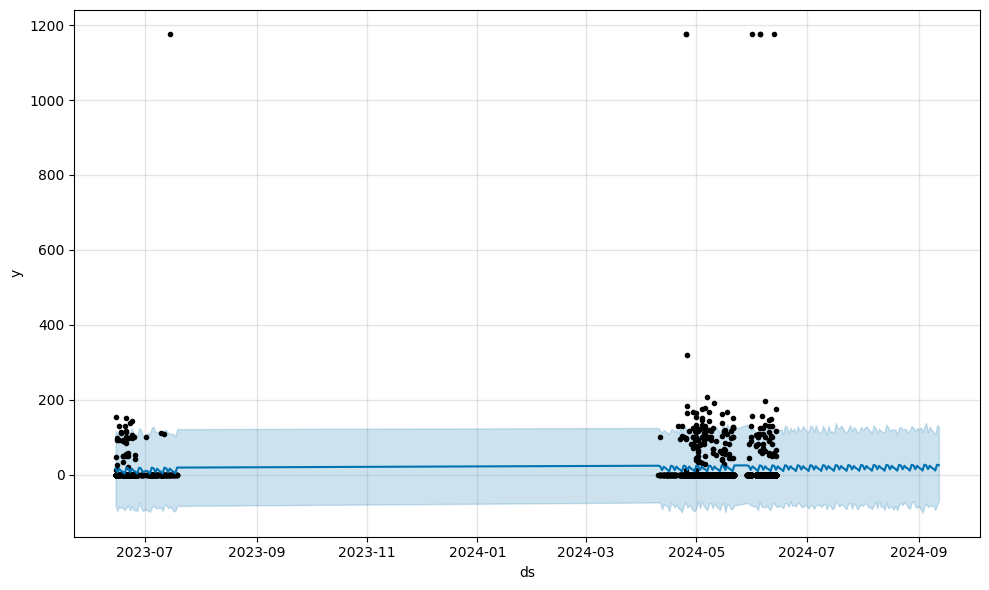

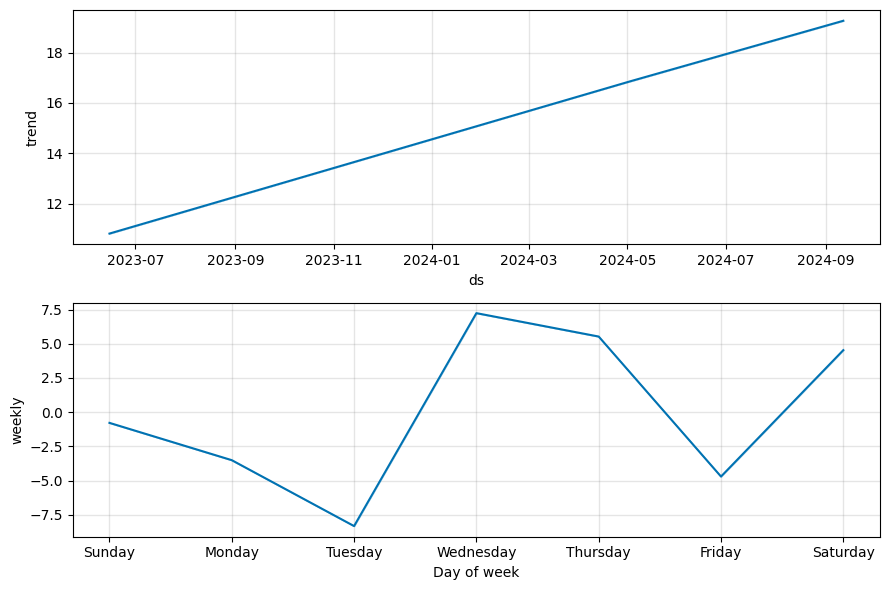

In [55]:
from prophet import Prophet

# Беру группу у которых много данныъ
target_group = tables[4296804896]

# Для предсказания нужны две колонки ds - дата, y - переменная которую предсказываем
target_group['ds'] = pd.to_datetime(target_group['Дата'])  
target_group = target_group.rename(columns={'wCTR (%)': 'y'}) 

# Создаем модель
model = Prophet()
model.fit(target_group)

# Выбираем на какое время делать предсказание и предсказываем
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Визуализация предсказаний и компонент
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

### Переделаем, сгруппировав по датам значения спроса

08:31:20 - cmdstanpy - INFO - Chain [1] start processing
08:31:20 - cmdstanpy - INFO - Chain [1] done processing
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

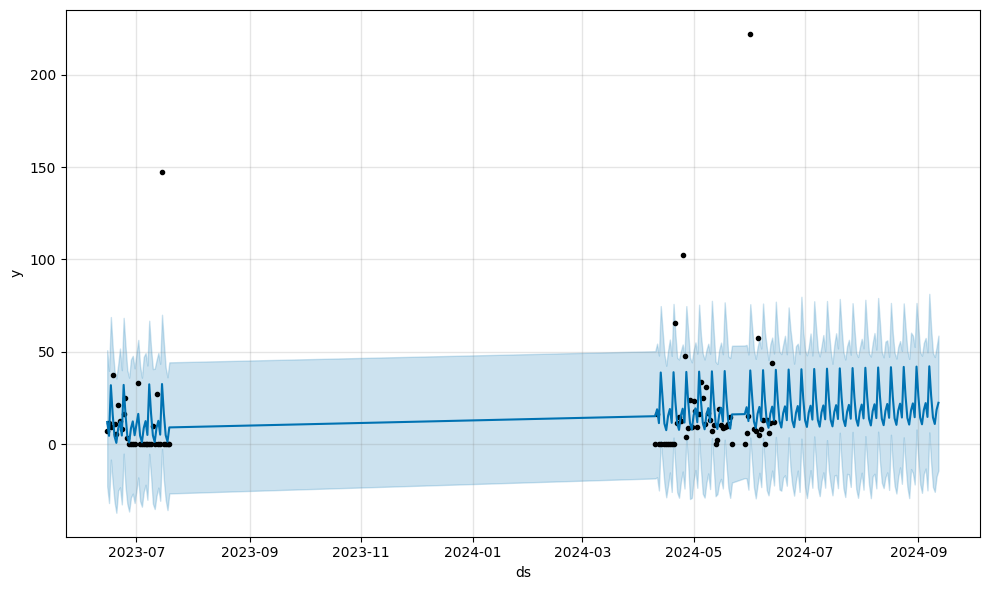

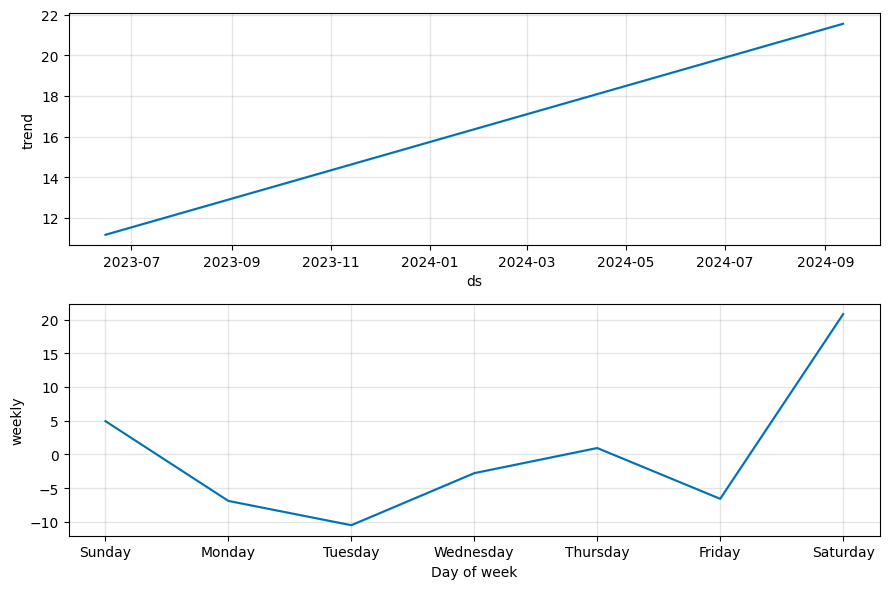

In [59]:
from prophet import Prophet

target_group = tables[4296804896]

target_group['ds'] = pd.to_datetime(target_group['Дата'])  
target_group = target_group.rename(columns={'wCTR (%)': 'y'})  
target_group = target_group[['ds', 'y']]

target_group = target_group.groupby('ds', as_index=False).mean()

model = Prophet()
model.fit(target_group)


future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

### Добавляем месячную сезонность

08:32:18 - cmdstanpy - INFO - Chain [1] start processing
08:32:18 - cmdstanpy - INFO - Chain [1] done processing
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

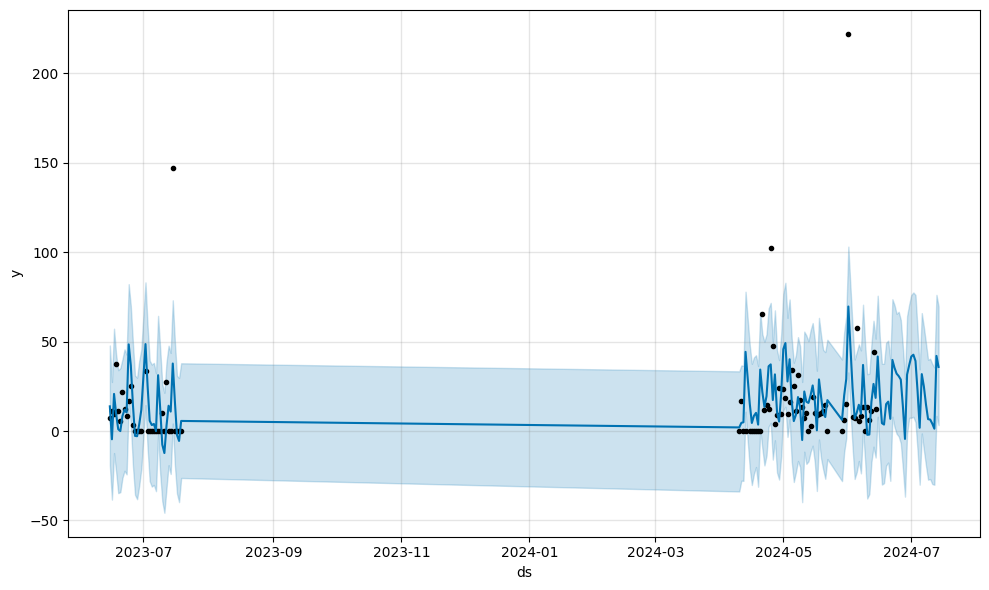

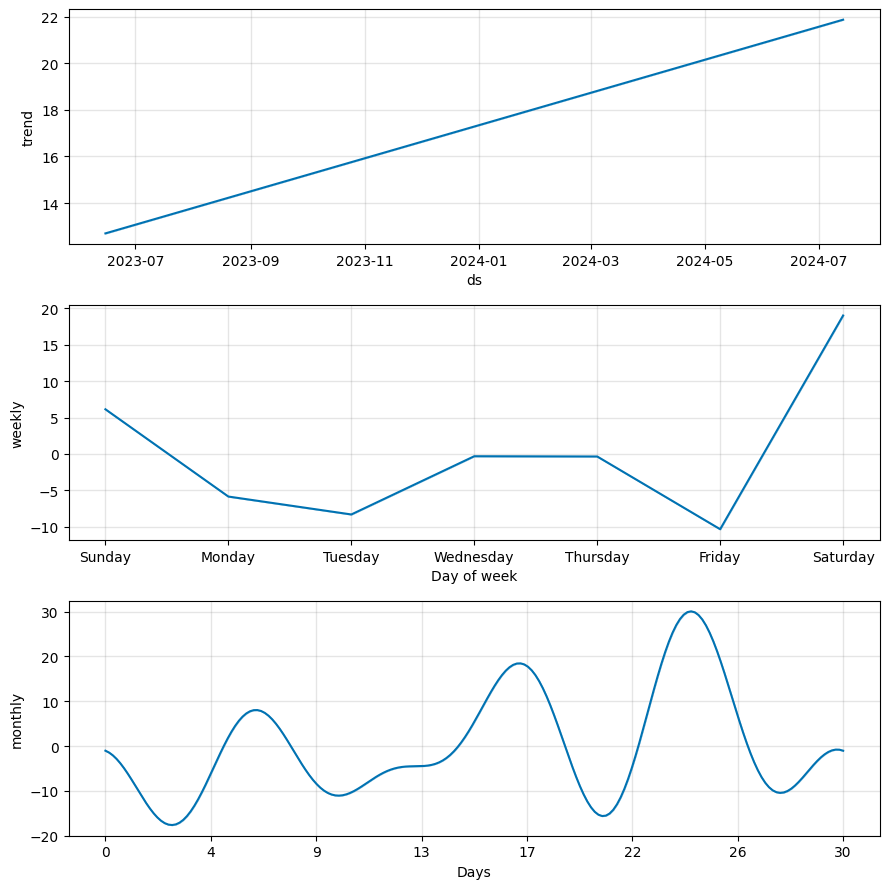

In [60]:
from prophet import Prophet

target_group = tables[4296804896]

target_group['ds'] = pd.to_datetime(target_group['Дата']) 
target_group = target_group.rename(columns={'wCTR (%)': 'y'})
target_group = target_group[['ds', 'y']]

target_group = target_group.groupby('ds', as_index=False).mean()


model = Prophet()
# Сезонность по месяцам
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(target_group)


future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


### Добавление праздников

08:35:25 - cmdstanpy - INFO - Chain [1] start processing
08:35:25 - cmdstanpy - INFO - Chain [1] done processing
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/zoya/miniconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

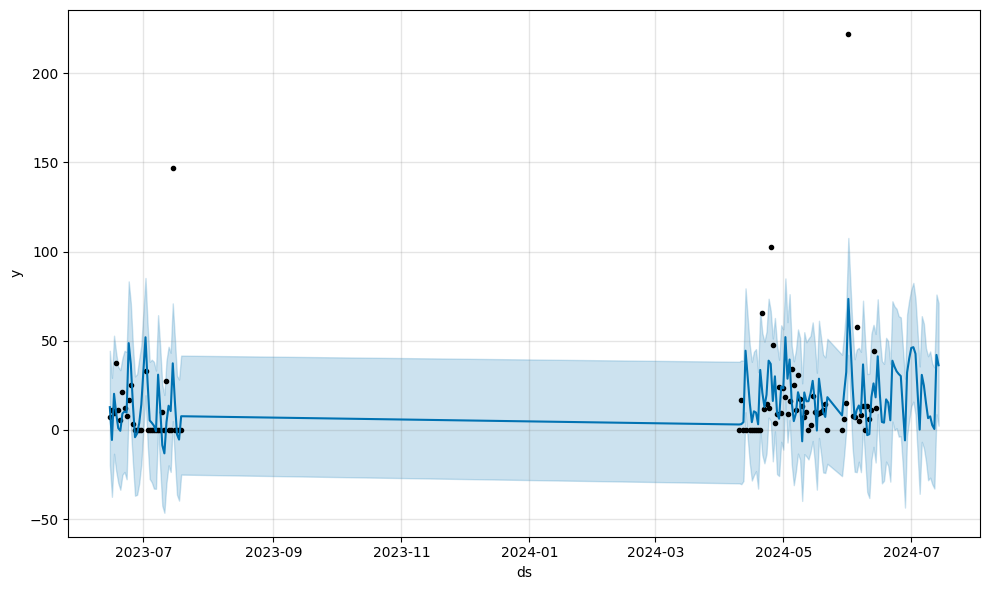

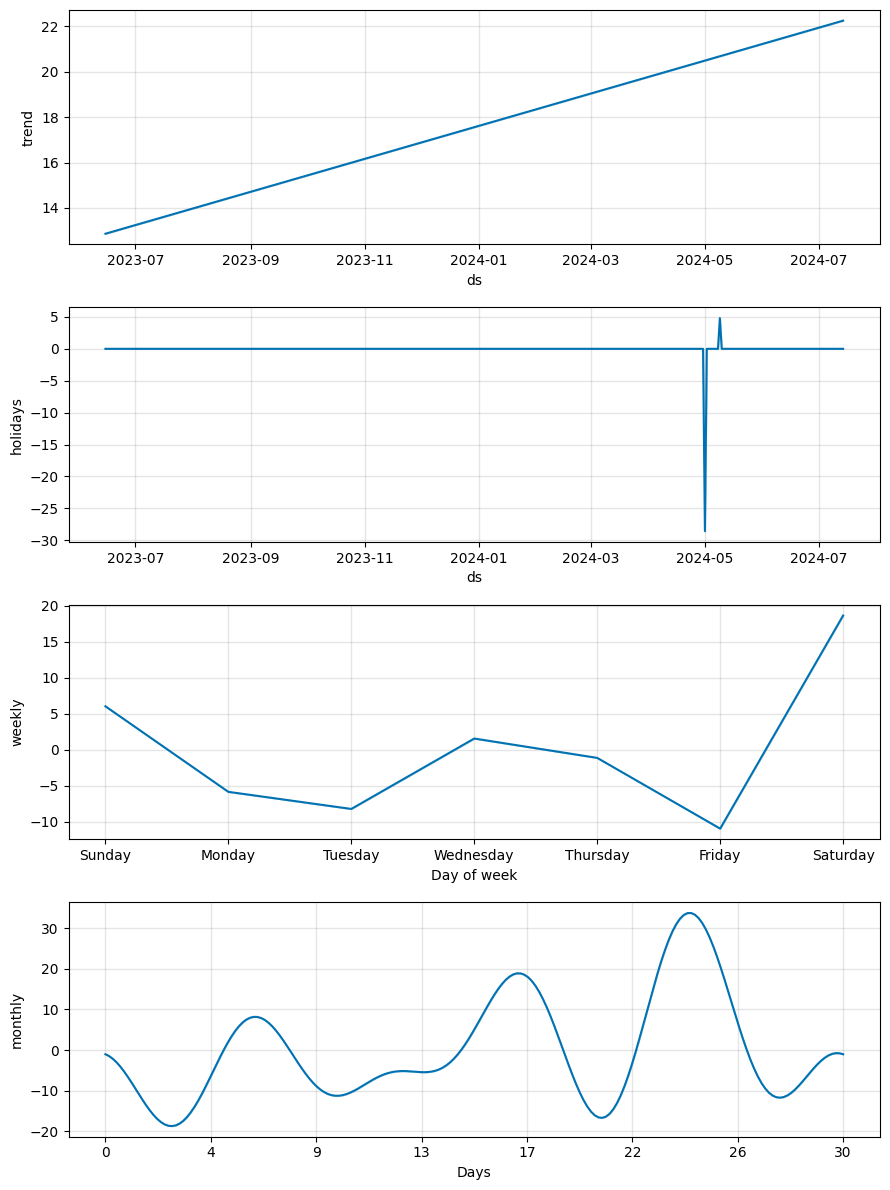

In [62]:
from prophet import Prophet

target_group = tables[4296804896]

target_group['ds'] = pd.to_datetime(target_group['Дата'])  # Rename 'Дата' to 'ds'
target_group = target_group.rename(columns={'wCTR (%)': 'y'})  # Rename 'Value' to 'y'

target_group = target_group[['ds', 'y']]
target_group = target_group.groupby('ds', as_index=False).mean()

# Майские праздники
may_holidays = pd.DataFrame({
    'ds': ['2024-05-01', '2024-05-09', '2025-05-01', '2025-05-09'],  # Добавьте даты на нужные годы
    'holiday': ['Spring and Labor Day', 'Victory Day', 'Spring and Labor Day', 'Victory Day']
})

model = Prophet(holidays=may_holidays)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(target_group)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


### Оценка модели

MAE: 16.368
MSE: 692.920
RMSE: 26.323
R²: 0.247


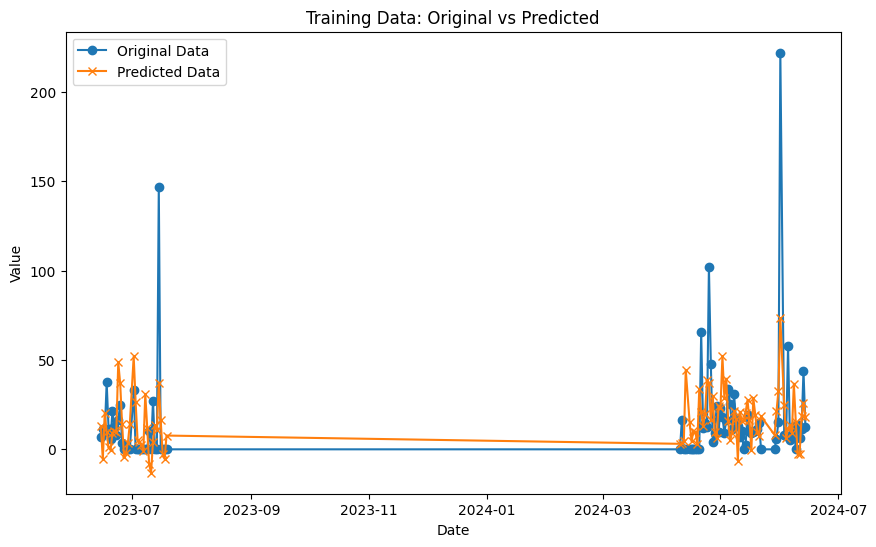

In [67]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_forecast = model.predict(target_group[['ds']])


mae = mean_absolute_error(target_group['y'], train_forecast['yhat'])
mse = mean_squared_error(target_group['y'], train_forecast['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(target_group['y'], train_forecast['yhat'])

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

plt.figure(figsize=(10, 6))
plt.plot(target_group['ds'], target_group['y'], label='Original Data', marker='o')
plt.plot(train_forecast['ds'], train_forecast['yhat'], label='Predicted Data', marker='x')
plt.title('Training Data: Original vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()